# Analyzing time series and images

### Multiple time series on common axes

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('stocks.csv')
# df = df.loc[:100,:]
df.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


In [3]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
aapl = df['AAPL']
ibm = df['IBM']
csco = df['CSCO']
msft = df['MSFT']

In [4]:
dates = df.index[::192]
labels = dates.strftime('%b %d')

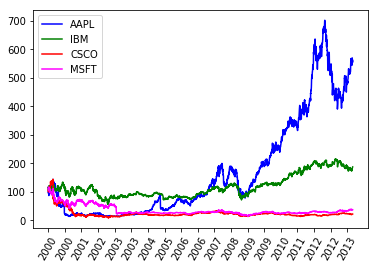

In [5]:
plt.plot(aapl, color='blue', label='AAPL')
plt.plot(ibm, color='green', label='IBM')
plt.plot(csco, color='red', label='CSCO')
plt.plot(msft, color='magenta', label='MSFT')
plt.legend(loc='upper left')
plt.xticks(dates, rotation=60)
plt.show()

### Multiple time series slices 

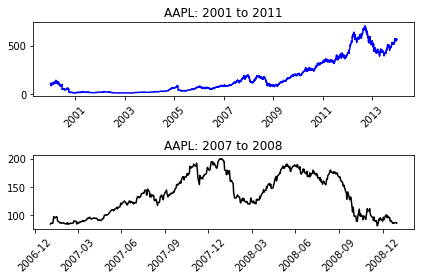

In [6]:
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

view = aapl['2007':'2008']

plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


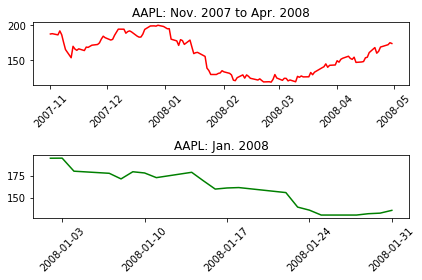

In [7]:
view = aapl['2007-11':'2008-04']

plt.subplot(2,1,1)
plt.plot(view, color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

view = aapl['2008-01']

plt.subplot(2,1,2)
plt.plot(view, color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Plotting an inset view

In [9]:
view = aapl['2007-11':'2008-04']

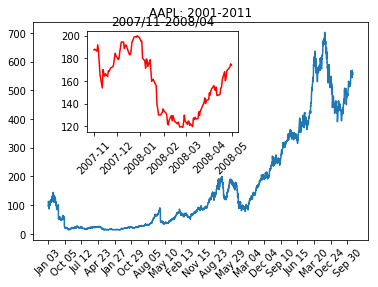

In [10]:
plt.plot(aapl)

plt.xticks(dates, labels, rotation=45)
plt.title('AAPL: 2001-2011')

plt.axes([0.25,0.5,0.35,0.35])

plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')

plt.show()

### Plotting moving averages

In [11]:
mean_30 = aapl.rolling(30).mean()
mean_75 = aapl.rolling(75).mean()
mean_125 = aapl.rolling(125).mean()
mean_250 = aapl.rolling(250).mean()

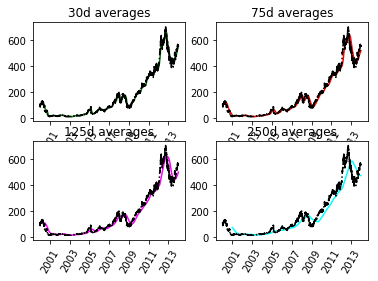

In [12]:
plt.subplot(2,2,1)
plt.plot(mean_30, 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

plt.subplot(2,2,4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

plt.show()

### Plotting moving standard deviations

In [13]:
std_30 = aapl.rolling(30).std()
std_75 = aapl.rolling(75).std()
std_125 = aapl.rolling(125).std()
std_250 = aapl.rolling(250).std()

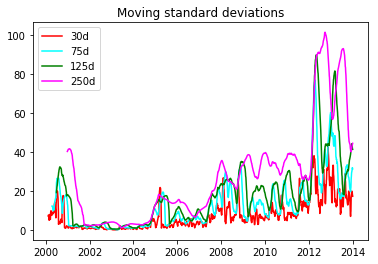

In [14]:
plt.plot(std_30, 'red', label='30d')

plt.plot(std_75, 'cyan', label='75d')

plt.plot(std_125, 'green', label='125d')

plt.plot(std_250, 'magenta', label='250d')

plt.legend(loc='upper left')
plt.title('Moving standard deviations')

plt.show()

### Extracting a histogram from a grayscale image

In [15]:
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

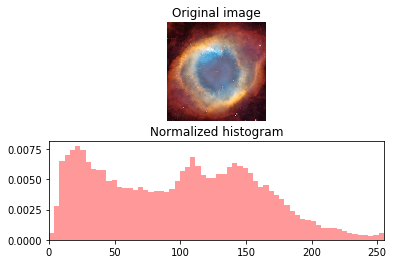

In [39]:
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

pixels = image.flatten()

plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,255), density=True, color='red', alpha=0.4)

plt.savefig('photo_hist.png')
plt.show()

### Cumulative Distribution Function from an image histogram

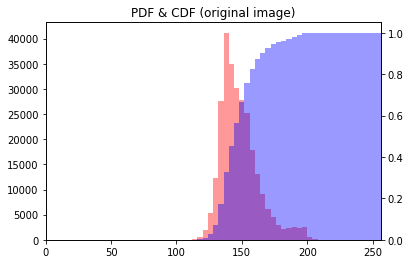

In [21]:
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False, color='red', alpha=0.4)
plt.grid(False)

plt.twinx()

cdf = plt.hist(pixels, bins=64, range=(0,256), density=True, cumulative=True, color='blue', alpha=0.4)
plt.xlim((0,256))
plt.grid(False)
plt.title('PDF & CDF (original image)')

plt.show()

### Equalizing an image histogram

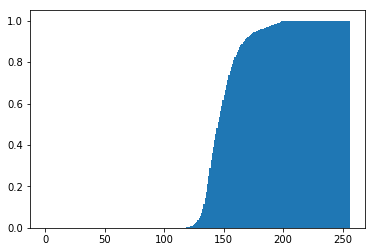

In [24]:
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)

In [25]:
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

In [26]:
new_image = new_pixels.reshape(427, 640)

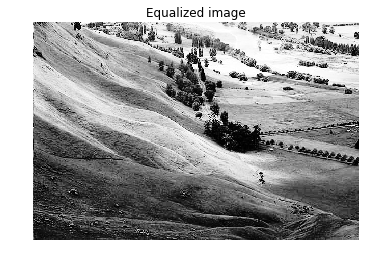

In [27]:
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')
plt.show()

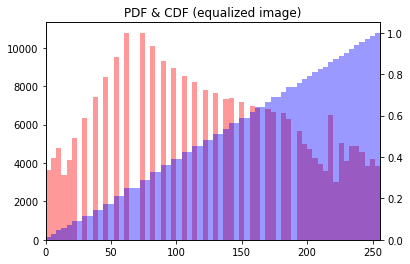

In [30]:
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False, color='red', alpha=0.4)
plt.grid(False)
plt.twinx()
plt.xlim((0,256))
plt.title('PDF & CDF (equalized image)')
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.show()

### Extracting histograms from a color image

In [31]:
image = plt.imread('nebula.jpg')

In [32]:
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

In [33]:
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

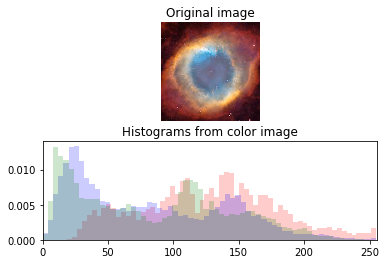

In [38]:
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2)
plt.show()